In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import fastparquet
import pyarrow as pa
import pyarrow.parquet as pq


In [3]:
# Lectura de archivos
# Analisis exploratorio
# Seleccion de columnas utiles para armar el sitema de recomendacion user-element 
# Construccion de matriz de utilidad 
# Consruccion de la funcion de recomendacion
# Deployar en render 

### Lectura de Datos Preparados

In [5]:
# Lectura steam_games
ruta='Datos_procesados/steam_games_clean.csv'
steam_games=pd.read_csv(ruta)
steam_games

,publisher,genres,app_name,release_date,tags,specs,price,early_access,id
0,Kotoshiro,Action,Lost Summoner Kitty,2018-01-04,Strategy,Single-player,4.99,False,761140
1,Kotoshiro,Action,Lost Summoner Kitty,2018-01-04,Action,Single-player,4.99,False,761140
2,Kotoshiro,Action,Lost Summoner Kitty,2018-01-04,Indie,Single-player,4.99,False,761140
3,Kotoshiro,Action,Lost Summoner Kitty,2018-01-04,Casual,Single-player,4.99,False,761140
4,Kotoshiro,Action,Lost Summoner Kitty,2018-01-04,Simulation,Single-player,4.99,False,761140
...,...,...,...,...,...,...,...,...,...
1931225,SIXNAILS,Indie,EXIT 2 - Directions,2017-09-02,Atmospheric,Steam Achievements,4.99,False,658870
1931226,SIXNAILS,Indie,EXIT 2 - Directions,2017-09-02,Atmospheric,Steam Cloud,4.99,False,658870
1931227,SIXNAILS,Indie,EXIT 2 - Directions,2017-09-02,Relaxing,Single-player,4.99,False,658870
1931228,SIXNAILS,Indie,EXIT 2 - Directions,2017-09-02,Relaxing,Steam Achievements,4.99,False,658870


In [6]:
# Lectura user_reviews
ruta='Datos_procesados/user_reviews_clean.csv'
user_reviews=pd.read_csv(ruta)
user_reviews

,user_id,item_id,recommend,review,review_posted,year,sentiment_analysis
0,76561197970982479,1250,True,Simple yet with great replayability. In my opi...,2011-11-05,2011.0,2
1,76561197970982479,22200,True,It's unique and worth a playthrough.,2011-07-15,2011.0,2
2,76561197970982479,43110,True,Great atmosphere. The gunplay can be a bit chu...,2011-04-21,2011.0,2
3,js41637,251610,True,I know what you think when you see this title ...,2014-06-24,2014.0,2
4,js41637,227300,True,For a simple (it's actually not all that simpl...,2013-09-08,2013.0,0
...,...,...,...,...,...,...,...
48493,wayfeng,730,True,its FUNNNNNNNN,2015-10-14,2015.0,1
48494,76561198251004808,253980,True,Awesome fantasy game if you don't mind the gra...,2015-10-10,2015.0,2
48495,72947282842,730,True,Prettyy Mad Game,2015-10-31,2015.0,0
48496,ApxLGhost,730,True,AMAZING GAME 10/10,2015-12-14,2015.0,2


In [7]:
# Lectura user_items
ruta='Datos_procesados/user_items_clean.csv'
user_items=pd.read_csv(ruta)
user_items

,user_id,items_count,steam_id,item_id,item_name,playtime_forever
0,76561197970982479,277,76561197970982479,10,Counter-Strike,6
1,76561197970982479,277,76561197970982479,20,Team Fortress Classic,0
2,76561197970982479,277,76561197970982479,30,Day of Defeat,7
3,76561197970982479,277,76561197970982479,40,Deathmatch Classic,0
4,76561197970982479,277,76561197970982479,50,Half-Life: Opposing Force,0
...,...,...,...,...,...,...
5094087,76561198329548331,7,76561198329548331,346330,BrainBread 2,0
5094088,76561198329548331,7,76561198329548331,373330,All Is Dust,0
5094089,76561198329548331,7,76561198329548331,388490,One Way To Die: Steam Edition,3
5094090,76561198329548331,7,76561198329548331,521570,You Have 10 Seconds 2,4


### Analisis exploratorio de los datos (EDA)

In [8]:
# FALTANTES 
# Preparacion de datos para el modelo de Machine learning 
# Eleccion de columnas con las que trabajare 
# Es necesario realizar alguna matriz de correlacion entra las variables ? que me aportaria ? , leer algo sobre el tema para orientarme

#### Datos de Steam_games

In [9]:
steam_games

,publisher,genres,app_name,release_date,tags,specs,price,early_access,id
0,Kotoshiro,Action,Lost Summoner Kitty,2018-01-04,Strategy,Single-player,4.99,False,761140
1,Kotoshiro,Action,Lost Summoner Kitty,2018-01-04,Action,Single-player,4.99,False,761140
2,Kotoshiro,Action,Lost Summoner Kitty,2018-01-04,Indie,Single-player,4.99,False,761140
3,Kotoshiro,Action,Lost Summoner Kitty,2018-01-04,Casual,Single-player,4.99,False,761140
4,Kotoshiro,Action,Lost Summoner Kitty,2018-01-04,Simulation,Single-player,4.99,False,761140
...,...,...,...,...,...,...,...,...,...
1931225,SIXNAILS,Indie,EXIT 2 - Directions,2017-09-02,Atmospheric,Steam Achievements,4.99,False,658870
1931226,SIXNAILS,Indie,EXIT 2 - Directions,2017-09-02,Atmospheric,Steam Cloud,4.99,False,658870
1931227,SIXNAILS,Indie,EXIT 2 - Directions,2017-09-02,Relaxing,Single-player,4.99,False,658870
1931228,SIXNAILS,Indie,EXIT 2 - Directions,2017-09-02,Relaxing,Steam Achievements,4.99,False,658870


In [10]:
len(steam_games['genres'].unique())

22

In [11]:
# Cantidad de juegos por genero

steam_games['id'].groupby(steam_games['genres']).count().sort_values(ascending=False)



genres
Indie                        441476
Action                       353637
Adventure                    230820
Casual                       180281
Strategy                     178538
RPG                          160247
Simulation                   145493
Free to Play                  65770
Early Access                  49120
Massively Multiplayer         40442
Sports                        39458
Racing                        29744
Design &amp; Illustration      3350
Utilities                      2579
sin_especificar                2560
Web Publishing                 2122
Animation &amp; Modeling       1948
Education                      1405
Software Training              1013
Video Production                503
Photo Editing                   501
Audio Production                223
Name: id, dtype: int64

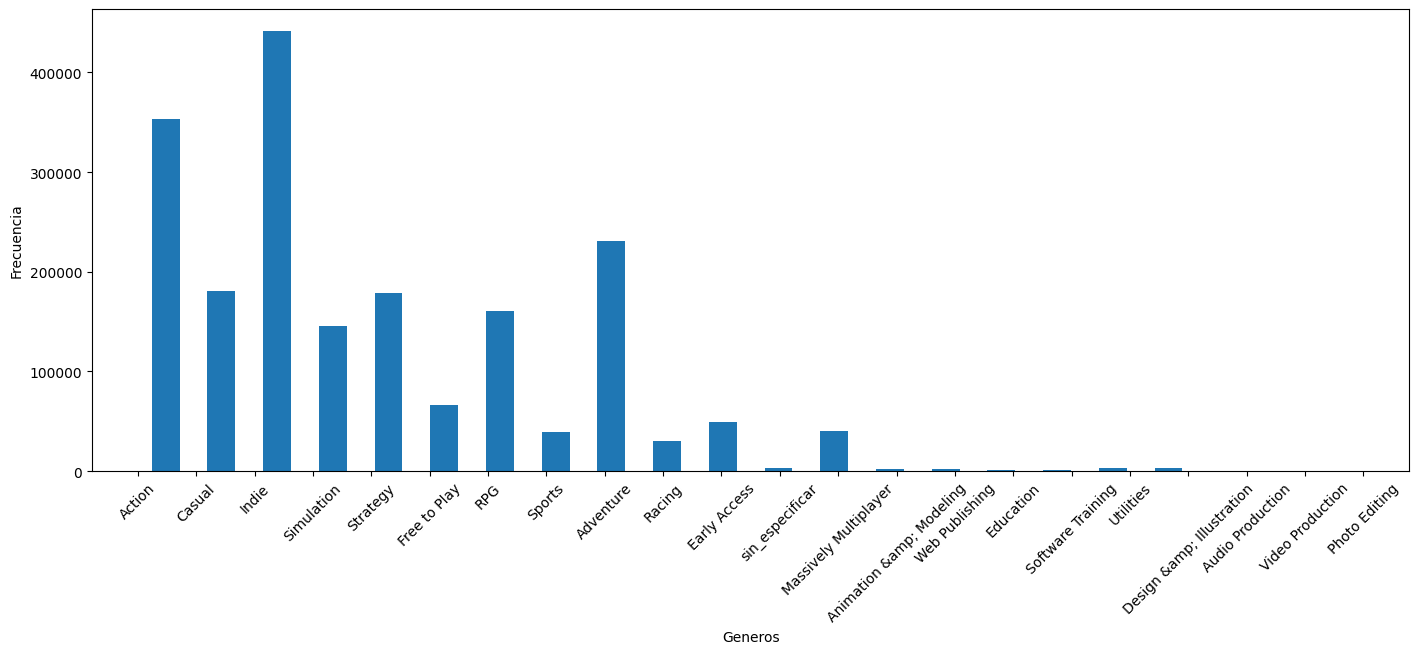

In [12]:
# Visualizacion en histograma
plt.figure(figsize=(17,6))
plt.hist(steam_games['genres'],bins=22,rwidth=0.5)
plt.xticks(rotation=45)
plt.xlabel('Generos')
plt.ylabel('Frecuencia')
plt.show()


#### Datos de User_reviews

In [13]:
user_reviews

,user_id,item_id,recommend,review,review_posted,year,sentiment_analysis
0,76561197970982479,1250,True,Simple yet with great replayability. In my opi...,2011-11-05,2011.0,2
1,76561197970982479,22200,True,It's unique and worth a playthrough.,2011-07-15,2011.0,2
2,76561197970982479,43110,True,Great atmosphere. The gunplay can be a bit chu...,2011-04-21,2011.0,2
3,js41637,251610,True,I know what you think when you see this title ...,2014-06-24,2014.0,2
4,js41637,227300,True,For a simple (it's actually not all that simpl...,2013-09-08,2013.0,0
...,...,...,...,...,...,...,...
48493,wayfeng,730,True,its FUNNNNNNNN,2015-10-14,2015.0,1
48494,76561198251004808,253980,True,Awesome fantasy game if you don't mind the gra...,2015-10-10,2015.0,2
48495,72947282842,730,True,Prettyy Mad Game,2015-10-31,2015.0,0
48496,ApxLGhost,730,True,AMAZING GAME 10/10,2015-12-14,2015.0,2


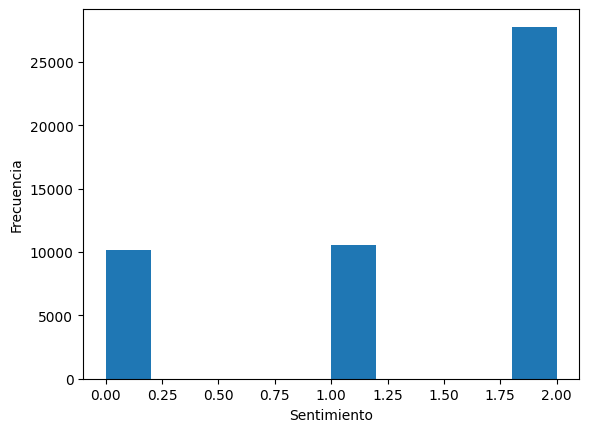

In [14]:
# Cantidad de reseñas positivas negativas y neutras, ver distribucion en un histograma o diagrama de torta
# poner etiqueta sobre cada barrita positivo, negativo o neutro

plt.hist(user_reviews['sentiment_analysis'])
plt.xlabel('Sentimiento')
plt.ylabel('Frecuencia')
plt.show()

#### Datos de user_items

In [16]:
user_items

,user_id,items_count,steam_id,item_id,item_name,playtime_forever
0,76561197970982479,277,76561197970982479,10,Counter-Strike,6
1,76561197970982479,277,76561197970982479,20,Team Fortress Classic,0
2,76561197970982479,277,76561197970982479,30,Day of Defeat,7
3,76561197970982479,277,76561197970982479,40,Deathmatch Classic,0
4,76561197970982479,277,76561197970982479,50,Half-Life: Opposing Force,0
...,...,...,...,...,...,...
5094087,76561198329548331,7,76561198329548331,346330,BrainBread 2,0
5094088,76561198329548331,7,76561198329548331,373330,All Is Dust,0
5094089,76561198329548331,7,76561198329548331,388490,One Way To Die: Steam Edition,3
5094090,76561198329548331,7,76561198329548331,521570,You Have 10 Seconds 2,4


#### Exploración de Cantidad de horas jugadas por cada usuario

In [17]:
# Ver rango de valores de la cantidad de horas jugadas por usuario

maximo=user_items['playtime_forever'].max()
minimo=user_items['playtime_forever'].min()
media=user_items['playtime_forever'].mean()

print('Maximo: ',maximo)
print('Minimo ', minimo)
print('Media ', media)

Maximo:  642773
Minimo  0
Media  990.5143915736112


In [18]:
# Data Frame que muestre usuarios y horas totales jugadas por cada uno (horas totales incluidos todos los juegos jugados por el usuario)
horas_por_usuario=user_items.loc[:,['user_id','playtime_forever']].groupby('user_id').sum()
horas_por_usuario

,playtime_forever
user_id,
--000--,141027
--ace--,70382
--ionex--,48084
-2SV-vuLB-Kg,54249
-404PageNotFound-,231260
...,...
zzonci,429
zzoptimuszz,82417
zzydrax,4640


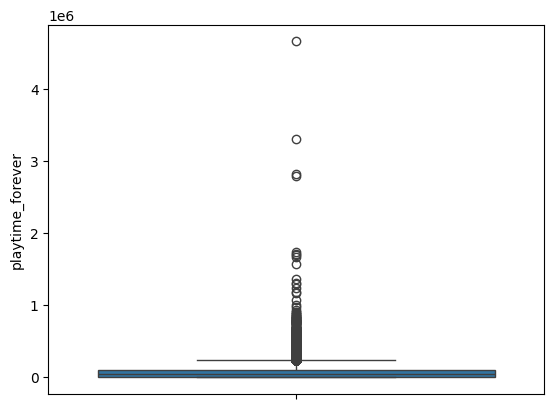

In [19]:
# Grafico de caja para horas jugadas
sns.boxplot(horas_por_usuario['playtime_forever'])
plt.show()

# Se observa que existen muchos outliers
## Modificar grafico para mejor visuazliacion

#### Exploración de la cantidad de juegos jugados por cada uno de los usuarios

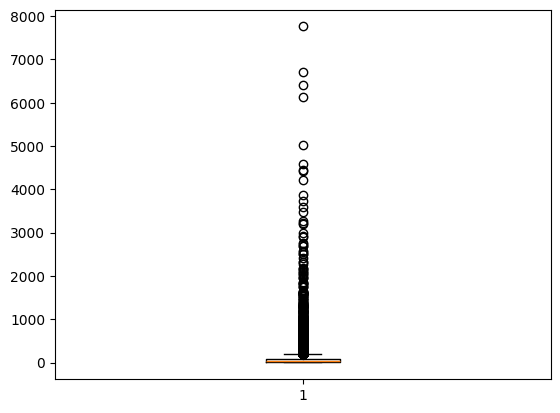

In [20]:
# Cantidad de juegos jugados por cada usuario (data frame de user_items)
juegos_x_jugador=user_items.loc[:,['user_id','items_count']].drop_duplicates()

# construir diagrama de caja con la cantidad de juegos jugados por cada  jugador
    #se observa una gran cantidad de outliers
plt.boxplot(juegos_x_jugador['items_count'])
plt.show()


In [21]:
# Cantidad de juegos por jugador

min=juegos_x_jugador['items_count'].min()
max=juegos_x_jugador['items_count'].max()
media=juegos_x_jugador['items_count'].mean()

print(f'Minimo: {min}, Maximo: {max}, Media : {media}')

Minimo: 1, Maximo: 7762, Media : 71.83667080324909


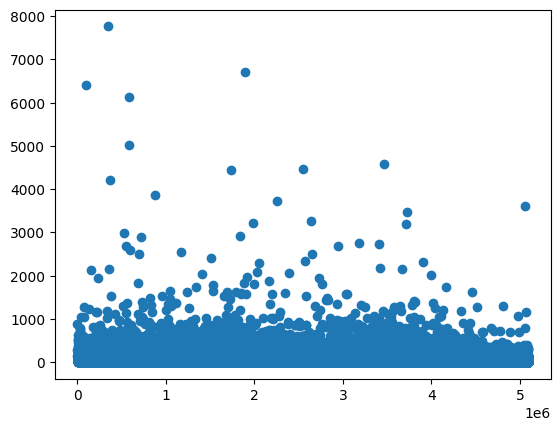

In [22]:
# Diagrama dispersion

plt.scatter(juegos_x_jugador.index,juegos_x_jugador['items_count'])
plt.show()

In [ ]:

# Matriz de correlacion 
# Eleccion de columnas relacionadas con el usuario, para la construccion del modelo de recomendacion

### Eleccion columnas

In [ ]:
# Puedo construir el modelo en base a los juegos que los usuarios jugaron (user_items) y agregar columnas del dataset user_items como recommend y sentiment_analysis (pero estas ultimas variables)
# no servirian como variables predictoras ya que no todos los usuarios hicieron reseñas

# Elijo el data frame user_items ya que es el que me proporciona que juegos jugó cada usuario 

In [23]:
user_items

,user_id,items_count,steam_id,item_id,item_name,playtime_forever
0,76561197970982479,277,76561197970982479,10,Counter-Strike,6
1,76561197970982479,277,76561197970982479,20,Team Fortress Classic,0
2,76561197970982479,277,76561197970982479,30,Day of Defeat,7
3,76561197970982479,277,76561197970982479,40,Deathmatch Classic,0
4,76561197970982479,277,76561197970982479,50,Half-Life: Opposing Force,0
...,...,...,...,...,...,...
5094087,76561198329548331,7,76561198329548331,346330,BrainBread 2,0
5094088,76561198329548331,7,76561198329548331,373330,All Is Dust,0
5094089,76561198329548331,7,76561198329548331,388490,One Way To Die: Steam Edition,3
5094090,76561198329548331,7,76561198329548331,521570,You Have 10 Seconds 2,4


In [24]:
user_reviews[user_reviews['recommend']==True]
# se observa que hay juegos que si fueron recomendados por el usuario pero el analisis de sentimiento dio negativo, dichos juegos suman una cantidad de 43557 juegos
# lo que corresponde a X% del total.

,user_id,item_id,recommend,review,review_posted,year,sentiment_analysis
0,76561197970982479,1250,True,Simple yet with great replayability. In my opi...,2011-11-05,2011.0,2
1,76561197970982479,22200,True,It's unique and worth a playthrough.,2011-07-15,2011.0,2
2,76561197970982479,43110,True,Great atmosphere. The gunplay can be a bit chu...,2011-04-21,2011.0,2
3,js41637,251610,True,I know what you think when you see this title ...,2014-06-24,2014.0,2
4,js41637,227300,True,For a simple (it's actually not all that simpl...,2013-09-08,2013.0,0
...,...,...,...,...,...,...,...
48493,wayfeng,730,True,its FUNNNNNNNN,2015-10-14,2015.0,1
48494,76561198251004808,253980,True,Awesome fantasy game if you don't mind the gra...,2015-10-10,2015.0,2
48495,72947282842,730,True,Prettyy Mad Game,2015-10-31,2015.0,0
48496,ApxLGhost,730,True,AMAZING GAME 10/10,2015-12-14,2015.0,2


In [ ]:
# la matriz de acontinuacion solo muestra los juegos jugados por el usuario, pero no indica si les gustaron o no, para ello lo ideal seria excluir aquellos juegos que al usuario no le gustaron, 
# de manera tal de que las recomendaciones sean mas optimas

#### **Sistema de Recomendación**

A continuación se desarrollará un sistema de recomendación de juegos, el cuál se llevará a cabo utilizando un metodo de filtrado colaborativo basado en el usuario (User-User), para ello el sistema se encargará de comparar a cada uno de los usuarios, buscando similitudes entre ellos (utilizando la técnica de similitud del coseno). Esto permitirá recomendar juegos a usuarios que tengan carasteriticas similares.

##### **Matriz User-item**

Inicialmente se creará una matriz donde cada indice de la misma corresponderá a un usuario y cada columna corresponderá a un juego. 
Esta matriz permite visualizar que juegos jugó y cuales no jugó el usuario.

In [25]:
# Construir la matriz user-item solo con los usuarios que tuvieron buenas experiencias con los juegos, para ello voy a usar el data frame user_reviews, solo los comentarios positivos y neutros
matriz_user_item=user_items.pivot_table(index='user_id',
                                columns='item_id',
                                values='playtime_forever',
                                aggfunc='sum')
matriz_user_item

item_id,10,20,30,40,50,60,70,80,100,130,...,527520,527570,527810,527890,527900,528580,528660,529670,529820,530720
user_id,,,,,,,,,,,,,,,,,,,,,
--000--,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
--ace--,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
--ionex--,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-2SV-vuLB-Kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-404PageNotFound-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zzonci,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zzoptimuszz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zzydrax,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# Mapea valores en 0 o 1
matriz_user_item=matriz_user_item.map(lambda x: 1 if x>0 else 0)
matriz_user_item

item_id,10,20,30,40,50,60,70,80,100,130,...,527520,527570,527810,527890,527900,528580,528660,529670,529820,530720
user_id,,,,,,,,,,,,,,,,,,,,,
--000--,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
--ace--,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
--ionex--,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-2SV-vuLB-Kg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-404PageNotFound-,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zzonci,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zzoptimuszz,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zzydrax,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### **Matriz de Utilidad**

A continuación se crea una matriz donde cada campo corresponde a la similitud existente entre cada usuario, para la construccion de la misma es necesario establecer la similitud existente entre cada uno de los usuarios, esta similitu está dada en terminos de que juegos jugó cada usuario. La mencionada matriz se conoce con el nombre de matriz de utilidad.

La similitud entre usuarios se lleva a cabo mediante la tecnica conocida como "similitud del coseno"

In [ ]:
# hacer funcion de recomendación 
     # con la matriz de similitud puedo obtener una lista de los usuarios mas similares al usuario objetivo
     # luego armo una lista con los juegos que jugaron los usuarios similares a mi usuario objetivo que no haya jugado mi usuario objetivo 
          # esto lo hago buscando con el nombre de usuario en el data frame user_items , es decir filtro el data frame por nombre de usuario, el usuario mas similar
          # camparlo las lista de juegos de cada usuario (el objetivo y el similar) y muestro los juegos que jugo mi similar pero no jugo el uusario objetivo

##### *Reducción de cantidad de registros*

Debido a la gran cantidad de juegos resulta imposible procesar de manera local semejante volumen de datos, es por ello que decidí reducir el numero de juegos para en consecuencia obtener una matriz de menor dimensión, para ello seleccionaré de manera aleatoria los juegos con los que trabajaré para desarrollar la similitud del coseno.

In [27]:
# Selección de 3.000 usuarios al azar
num_juegos=3000
matriz_reducida=matriz_user_item.sample(num_juegos,axis=0)
matriz_reducida

item_id,10,20,30,40,50,60,70,80,100,130,...,527520,527570,527810,527890,527900,528580,528660,529670,529820,530720
user_id,,,,,,,,,,,,,,,,,,,,,
76561198170255685,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
goldenwarrior,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TheSanicTheHedgehog,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76561198063472034,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76561197998463688,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76561198067009671,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76561197972873385,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
nightstalka258,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
matriz_reducida.index.name=None
matriz_reducida

item_id,10,20,30,40,50,60,70,80,100,130,...,527520,527570,527810,527890,527900,528580,528660,529670,529820,530720
76561198170255685,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
goldenwarrior,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TheSanicTheHedgehog,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76561198063472034,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76561197998463688,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76561198067009671,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76561197972873385,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
nightstalka258,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76561198057065903,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
matriz_reducida.columns.name=None
matriz_reducida

,10,20,30,40,50,60,70,80,100,130,...,527520,527570,527810,527890,527900,528580,528660,529670,529820,530720
76561198170255685,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
goldenwarrior,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TheSanicTheHedgehog,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76561198063472034,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76561197998463688,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76561198067009671,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76561197972873385,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
nightstalka258,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76561198057065903,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
# Pasar a tipo string el nombre de las columnas 
matriz_reducida.columns=matriz_reducida.columns.astype(str)
matriz_reducida.columns

Index(['10', '20', '30', '40', '50', '60', '70', '80', '100', '130',
       ...
       '527520', '527570', '527810', '527890', '527900', '528580', '528660',
       '529670', '529820', '530720'],
      dtype='object', length=10978)

##### *Matriz user_user*

A continuación se creará la matriz user_user, donde cada elemento de la matriz corresponde a la similitud existente entre usuarios, para la construccion de esta matriz se utiliza la tecnica de similitud del coseno. 

In [30]:
# Aplica tecnica de similitud del coseno 
matriz_utilidad=pd.DataFrame(cosine_similarity(matriz_reducida))
matriz_utilidad


,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
0,1.000000,0.053300,0.123091,0.091287,0.086031,0.000000,0.158114,0.109109,0.353553,0.158114,...,0.000000,0.000000,0.162221,0.052559,0.000000,0.085749,0.143592,0.076696,0.114332,0.051571
1,0.053300,1.000000,0.157459,0.116775,0.256786,0.146254,0.000000,0.186097,0.150756,0.202260,...,0.231627,0.000000,0.172929,0.190495,0.000000,0.109691,0.153069,0.212573,0.170630,0.131940
2,0.123091,0.157459,1.000000,0.179787,0.084717,0.126660,0.000000,0.241747,0.174078,0.155700,...,0.066865,0.000000,0.159745,0.142330,0.000000,0.084440,0.070700,0.075525,0.126660,0.203135
3,0.091287,0.116775,0.179787,1.000000,0.125656,0.187867,0.000000,0.199205,0.258199,0.115470,...,0.099177,0.000000,0.177705,0.134342,0.000000,0.000000,0.078648,0.056011,0.187867,0.188311
4,0.086031,0.256786,0.084717,0.125656,1.000000,0.137706,0.000000,0.175219,0.081111,0.108821,...,0.197318,0.000000,0.111648,0.259243,0.057354,0.078689,0.205889,0.158358,0.347543,0.165637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.085749,0.109691,0.084440,0.000000,0.078689,0.000000,0.108465,0.112272,0.000000,0.108465,...,0.031054,0.000000,0.166924,0.054083,0.000000,1.000000,0.123129,0.105227,0.117647,0.070755
2996,0.143592,0.153069,0.070700,0.078648,0.205889,0.049252,0.045408,0.156671,0.101535,0.090815,...,0.104001,0.000000,0.116468,0.143393,0.000000,0.123129,1.000000,0.198234,0.197006,0.088862
2997,0.076696,0.212573,0.075525,0.056011,0.158358,0.026307,0.048507,0.217575,0.108465,0.194029,...,0.208313,0.000000,0.124418,0.112870,0.000000,0.105227,0.198234,1.000000,0.157840,0.094928
2998,0.114332,0.170630,0.126660,0.187867,0.347543,0.098039,0.072310,0.199595,0.080845,0.072310,...,0.124214,0.000000,0.204019,0.282431,0.057166,0.117647,0.197006,0.157840,1.000000,0.188680


In [31]:
# Cambiar nombres a indice y columnas por los valores correspondientes a los usuarios
matriz_utilidad=matriz_utilidad.set_index(matriz_reducida.index)
matriz_utilidad.index.name=None
matriz_utilidad.columns=matriz_reducida.index
matriz_utilidad

,76561198170255685,goldenwarrior,TheSanicTheHedgehog,76561198063472034,76561197998463688,ramarizandre,76561198084281560,76561198048001555,76561198069991578,vihzyandswag,...,deelayy,76561198054088087,76561198042079555,Khaooschannel,76561198139783957,76561198067009671,76561197972873385,nightstalka258,76561198057065903,DrexelWhiteWalter
76561198170255685,1.000000,0.053300,0.123091,0.091287,0.086031,0.000000,0.158114,0.109109,0.353553,0.158114,...,0.000000,0.000000,0.162221,0.052559,0.000000,0.085749,0.143592,0.076696,0.114332,0.051571
goldenwarrior,0.053300,1.000000,0.157459,0.116775,0.256786,0.146254,0.000000,0.186097,0.150756,0.202260,...,0.231627,0.000000,0.172929,0.190495,0.000000,0.109691,0.153069,0.212573,0.170630,0.131940
TheSanicTheHedgehog,0.123091,0.157459,1.000000,0.179787,0.084717,0.126660,0.000000,0.241747,0.174078,0.155700,...,0.066865,0.000000,0.159745,0.142330,0.000000,0.084440,0.070700,0.075525,0.126660,0.203135
76561198063472034,0.091287,0.116775,0.179787,1.000000,0.125656,0.187867,0.000000,0.199205,0.258199,0.115470,...,0.099177,0.000000,0.177705,0.134342,0.000000,0.000000,0.078648,0.056011,0.187867,0.188311
76561197998463688,0.086031,0.256786,0.084717,0.125656,1.000000,0.137706,0.000000,0.175219,0.081111,0.108821,...,0.197318,0.000000,0.111648,0.259243,0.057354,0.078689,0.205889,0.158358,0.347543,0.165637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76561198067009671,0.085749,0.109691,0.084440,0.000000,0.078689,0.000000,0.108465,0.112272,0.000000,0.108465,...,0.031054,0.000000,0.166924,0.054083,0.000000,1.000000,0.123129,0.105227,0.117647,0.070755
76561197972873385,0.143592,0.153069,0.070700,0.078648,0.205889,0.049252,0.045408,0.156671,0.101535,0.090815,...,0.104001,0.000000,0.116468,0.143393,0.000000,0.123129,1.000000,0.198234,0.197006,0.088862
nightstalka258,0.076696,0.212573,0.075525,0.056011,0.158358,0.026307,0.048507,0.217575,0.108465,0.194029,...,0.208313,0.000000,0.124418,0.112870,0.000000,0.105227,0.198234,1.000000,0.157840,0.094928
76561198057065903,0.114332,0.170630,0.126660,0.187867,0.347543,0.098039,0.072310,0.199595,0.080845,0.072310,...,0.124214,0.000000,0.204019,0.282431,0.057166,0.117647,0.197006,0.157840,1.000000,0.188680


#### **Exportación de DataFrames utiles para el desarrollo del sistema de recomendación**

In [47]:
# Exportar datos en parcket para evitar errores al momento de pushearlos a git hub 
# Escribir el DataFrame en formato parquet 
ruta='Datos_procesados/matriz_utilidad.parquet'
fastparquet.write(ruta,matriz_utilidad)



In [66]:
# Exportar datos en parcket para evitar errores al momento de pushearlos a git hub
# ruta='Datos_procesados/matriz_user_item.parquet'
#fastparquet.write(ruta,matriz_reducida)


ruta='Datos_procesados/matriz_user-item.csv'
matriz_reducida.to_csv(ruta)

In [173]:
def sistema_recomendacion(usuario_objetivo):
    # Dataframe con nombre de juegos 
    df_nombres=user_items.loc[:,['item_id','item_name']]
    # Determinación del usuario mas similar al usuario objetivo
    matriz_similares=matriz_utilidad[usuario_objetivo].sort_values(ascending=False)[1:].reset_index()
    usuario_similar=list(matriz_similares.iloc[0].values)[0]
    #Lista de juegos jugados por usuario objetivo 
    lista_=matriz_reducida.loc[usuario_objetivo,:]
    lista_juegos_usuario_objetivo=list(lista_[lista_==1].index)
    #Lista de juegos jugados por usuario similar
    lista2_=matriz_reducida.loc[usuario_similar,:]
    lista_juegos_usuario_similar=list(lista2_[lista2_==1].index)
    recomendaciones= [juego for juego in lista_juegos_usuario_similar if juego not in lista_juegos_usuario_objetivo]
    resultado=list(df_nombres[df_nombres['item_id'].isin(recomendaciones)]['item_name'])
    return recomendaciones#resultado[0:5]



In [174]:
lista_con_nombres=sistema_recomendacion('HAHAOHWOW')
lista_con_nombres

[240,
 4000,
 4920,
 9930,
 12220,
 12800,
 12830,
 24670,
 33910,
 33930,
 41070,
 42910,
 44320,
 44340,
 47830,
 49520,
 65730,
 91310,
 201790,
 204300,
 208090,
 212630,
 220200,
 220260,
 223750,
 225420,
 226980,
 232010,
 232950,
 234630,
 243360,
 243870,
 245490,
 245550,
 250600,
 253710,
 255220,
 261640,
 263280,
 301520,
 304930,
 311210,
 313160,
 321040]